# Tugas klasifikasi
## Rahmat Sunjani [ 55201120030 ]
## Putri Avrilya [ 55201120030 ]

In [1]:
import pandas as pd
# url = 'https://bit.ly/3tZGkAR'
url = '../kaggle-survey-2022/kaggle_survey_2022_responses.csv'
df = pd.read_csv(url)
df = df.rename(columns= {'Duration (in seconds)':'Q1'})

C:\Users\user\AppData\Local\Temp\ipykernel_13264\3601072372.py:4: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [2]:
## change to view all collum use
df = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_7', 'Q6_8', 'Q11', 'Q23', 'Q24']]

In [3]:
## change name to view all collum use
df = df.rename(columns={'Q1':'duration', 'Q2':'age', 'Q3':'gender', 'Q4':'country', 'Q5':'educational_status','Q6_1':'coursera', 'Q6_2':'edX', 'Q6_3':'kaggle', 'Q6_4':'datacamp', 'Q6_7':'udemy', 'Q6_8':'linkedIn', 'Q11':'writing_code_year', 'Q23':'current_role', 'Q24':'current_industry'})[1:]

In [4]:
courses = df[['coursera', 'edX', 'kaggle', 'datacamp', 'udemy', 'linkedIn']]
print(courses)#.columns.tolist()

       coursera  edX                kaggle  datacamp  udemy           linkedIn
1           NaN  NaN                   NaN       NaN    NaN                NaN
2           NaN  NaN                   NaN       NaN    NaN                NaN
3      Coursera  edX                   NaN  DataCamp  Udemy  LinkedIn Learning
4      Coursera  NaN  Kaggle Learn Courses       NaN  Udemy                NaN
5           NaN  NaN                   NaN       NaN    NaN                NaN
...         ...  ...                   ...       ...    ...                ...
23993       NaN  NaN                   NaN       NaN    NaN                NaN
23994       NaN  NaN                   NaN       NaN    NaN                NaN
23995       NaN  NaN                   NaN  DataCamp  Udemy                NaN
23996       NaN  NaN  Kaggle Learn Courses       NaN    NaN                NaN
23997       NaN  NaN                   NaN       NaN    NaN                NaN

[23997 rows x 6 columns]


In [5]:
# cek data null atau kosong ( namun data lain bisa digunakan )
df.isna().sum()

duration                  0
age                       0
gender                    0
country                   0
educational_status        0
coursera              14298
edX                   21523
kaggle                17369
datacamp              20279
udemy                 17881
linkedIn              21231
writing_code_year       754
current_role          13367
current_industry      14903
dtype: int64

In [6]:
# Cek Data Type
df.dtypes

duration              object
age                   object
gender                object
country               object
educational_status    object
coursera              object
edX                   object
kaggle                object
datacamp              object
udemy                 object
linkedIn              object
writing_code_year     object
current_role          object
current_industry      object
dtype: object

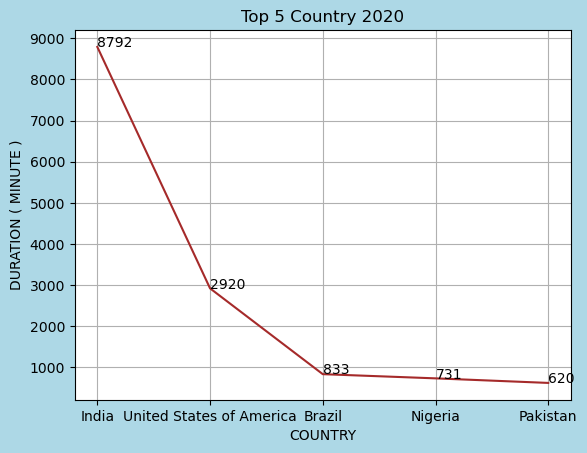



=== Top 5 Negara Pengunjung Terbanyak ===

India                       8792
United States of America    2920
Brazil                       833
Nigeria                      731
Pakistan                     620
Name: country, dtype: int64


===== INSIGHT =====




In [7]:
# 1. Menampilkan data berdasarkan country terbanyak pengunjung survey.
soal_1 = ff = df[df['country'] != 'Other']
df[['age', 'gender', 'educational_status', 'country', 'duration']]
# CARI DATA COUNTRY
country_10 = soal_1['country'].value_counts()[:5]

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig.patch.set_facecolor('lightblue')  # type: ignore

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
x = country_10.index.tolist()
y = country_10.tolist()
plt.xlabel('COUNTRY')
plt.ylabel('DURATION ( MINUTE )')
plt.title('Top 5 Country 2020')
plt.grid(True)
plt.plot(x, y,color='brown')
addlabels(x, y)
plt.show()

print(f'\n\n=== Top 5 Negara Pengunjung Terbanyak ===\n\n{country_10}')
print(f'\n\n===== INSIGHT =====\n\n')

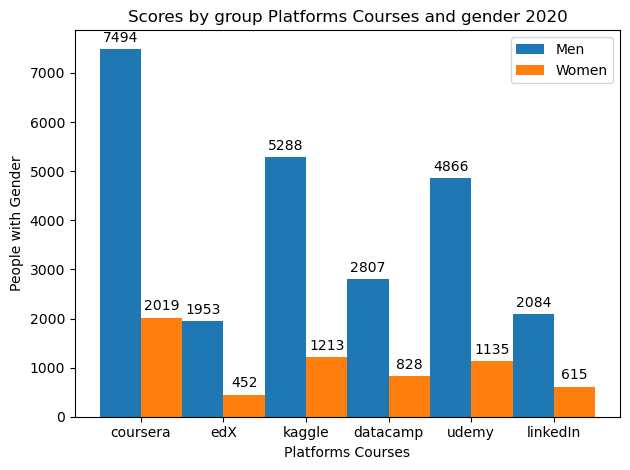


=== Jumlah Gender Menurut Platform Courses ===

COURSERA : 

Man      7494
Woman    2019
Name: gender, dtype: int64

EDX : 

Man      1953
Woman     452
Name: gender, dtype: int64

KAGGLE : 

Man      5288
Woman    1213
Name: gender, dtype: int64

DATACAMP : 

Man      2807
Woman     828
Name: gender, dtype: int64

UDEMY : 

Man      4866
Woman    1135
Name: gender, dtype: int64

LINKEDIN: 

Man      2084
Woman     615
Name: gender, dtype: int64


===== INSIGHT =====




In [8]:
# 2. Menampilkan data age berdasarkan platforms_courses.

join = df[['gender', 'coursera', 'edX', 'kaggle', 'datacamp', 'udemy', 'linkedIn']]

coursera = join[(df['coursera'] == 'Coursera') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
M_coursera = coursera['gender'][coursera['gender'] == 'Man'].count()
W_coursera = coursera['gender'][coursera['gender'] == 'Woman'].count()

edX = join[(df['edX'] == 'edX') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
M_edX = edX['gender'][edX['gender'] == 'Man'].count()
W_edX = edX['gender'][edX['gender'] == 'Woman'].count()

kaggle = join[(df['kaggle'] == 'Kaggle Learn Courses') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
M_kaggle = kaggle['gender'][kaggle['gender'] == 'Man'].count()
W_kaggle = kaggle['gender'][kaggle['gender'] == 'Woman'].count()

datacamp = join[(df['datacamp'] == 'DataCamp') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
M_datacamp  = datacamp['gender'][datacamp['gender'] == 'Man'].count()
W_datacamp  = datacamp['gender'][datacamp['gender'] == 'Woman'].count()

udemy = join[(df['udemy'] == 'Udemy') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
M_udemy  = udemy['gender'][udemy['gender'] == 'Man'].count()
W_udemy  = udemy['gender'][udemy['gender'] == 'Woman'].count()

linkedIn = join[(df['linkedIn'] == 'LinkedIn Learning') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
M_linkedIn  = linkedIn['gender'][linkedIn['gender'] == 'Man'].count()
W_linkedIn  = linkedIn['gender'][linkedIn['gender'] == 'Woman'].count()

import matplotlib.pyplot as plt
import numpy as np


labels = courses.columns.to_list() # 6
men_means = [M_coursera, M_edX, M_kaggle, M_datacamp, M_udemy, M_linkedIn]
women_means = [W_coursera, W_edX, W_kaggle, W_datacamp, W_udemy, W_linkedIn]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - (width/2), men_means, width, label='Men')
rects2 = ax.bar(x + (width/2), women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('People with Gender')
ax.set_xlabel('Platforms Courses')
ax.set_title('Scores by group Platforms Courses and gender 2020')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()

print('\n=== Jumlah Gender Menurut Platform Courses ===')
print('\nCOURSERA : \n')
print(coursera['gender'].value_counts())
print('\nEDX : \n')
print(edX['gender'].value_counts())
print('\nKAGGLE : \n')
print(kaggle['gender'].value_counts())
print('\nDATACAMP : \n')
print(datacamp['gender'].value_counts())
print('\nUDEMY : \n')
print(udemy['gender'].value_counts())
print('\nLINKEDIN: \n')
print(linkedIn['gender'].value_counts())

print(f'\n\n===== INSIGHT =====\n\n')

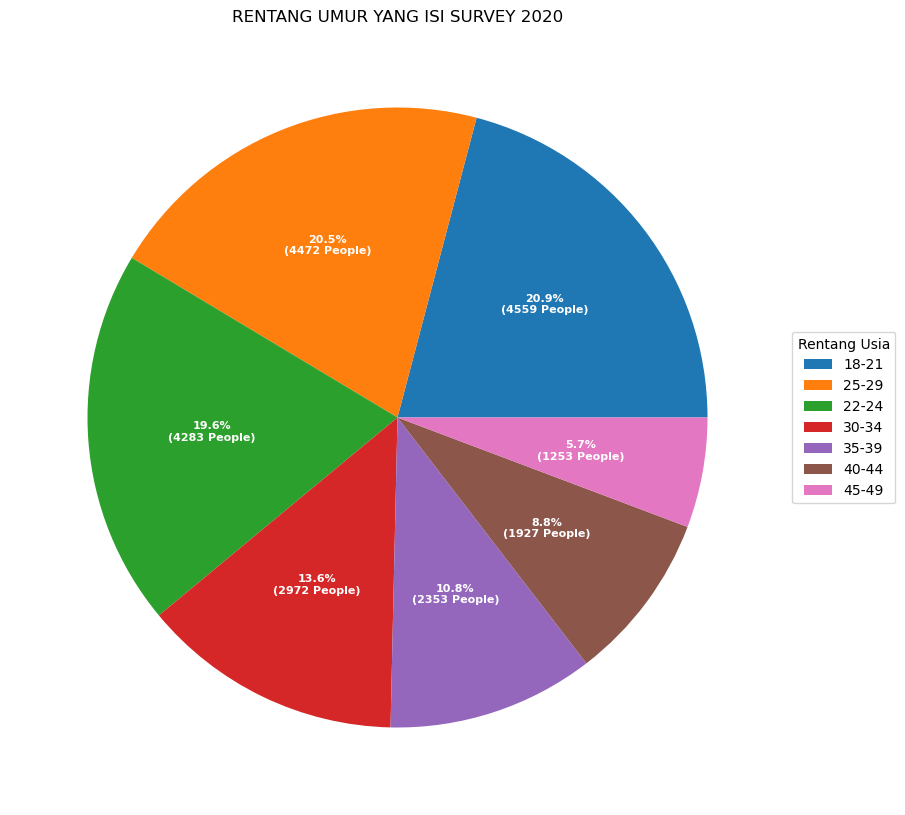


=== DATA RENTANG UMUR YANG ISI SURVEY 2020 ===

18-21    4559
25-29    4472
22-24    4283
30-34    2972
35-39    2353
40-44    1927
45-49    1253
Name: age, dtype: int64



In [9]:
## 3. Tampilkan age pengguna yang paling banyak menggunakan platfrom courses
GG = df[(df['age'] != '50-54') & (df['age'] != '55-59') & (df['age'] != '60-69') & (df['age'] != '70+')]
GG = GG['age'].value_counts()

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,15), subplot_kw=dict(aspect="equal"))
data = GG.tolist()
ingredients = GG.index.tolist()

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} People)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))
ax.legend(wedges, ingredients, title="Rentang Usia", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("RENTANG UMUR YANG ISI SURVEY 2020")
plt.show()

print(f'\n=== DATA RENTANG UMUR YANG ISI SURVEY 2020 ===\n\n{GG}\n')

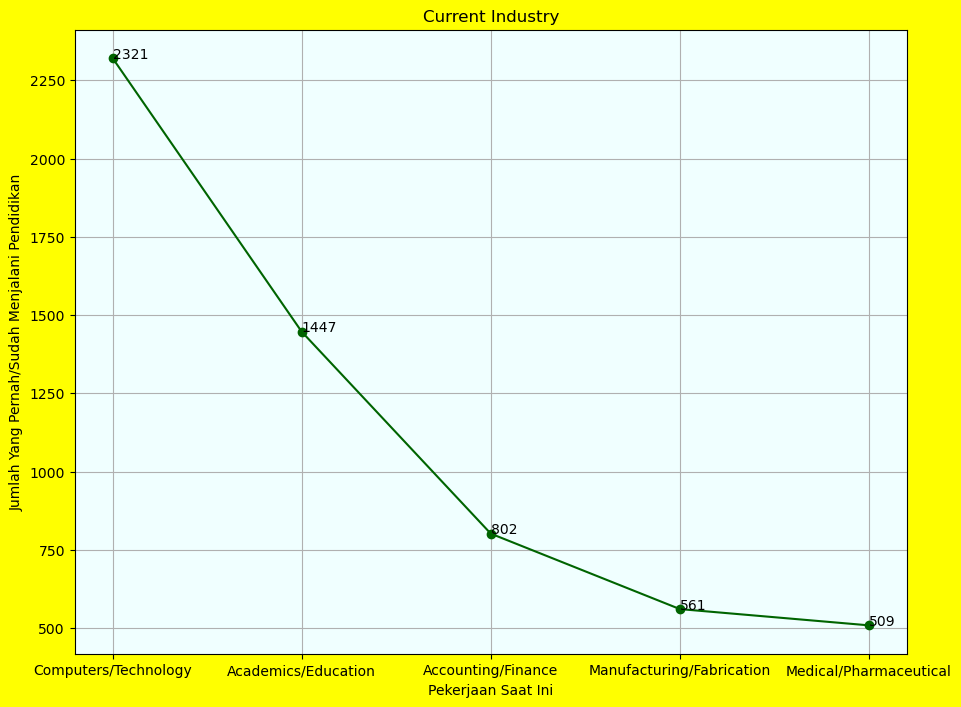

Computers/Technology         2321
Academics/Education          1447
Accounting/Finance            802
Manufacturing/Fabrication     561
Medical/Pharmaceutical        509
Name: current_industry, dtype: int64


In [10]:
## 4. Menampilkan data educational_status berdasarkan current_industry

soal_4 = df[df['current_industry'] != 'Other']
soal_4 = soal_4[['educational_status','current_industry']]
soal_4['current_industry'].value_counts()[:5]
hasil = soal_4['current_industry'].value_counts()[:5]


import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_axes([0,0,1.3,1.3])
fig.patch.set_facecolor('yellow')  # type: ignore

y = hasil.tolist()
x = hasil.index.tolist()

plt.xlabel('Pekerjaan Saat Ini')
plt.ylabel('Jumlah Yang Pernah/Sudah Menjalani Pendidikan')
ax.set_facecolor("azure")

plt.title('Current Industry')
plt.grid(True)
plt.plot(x,y, marker = 'o',color='darkgreen')
addlabels(x, y)
plt.show()

print(hasil)

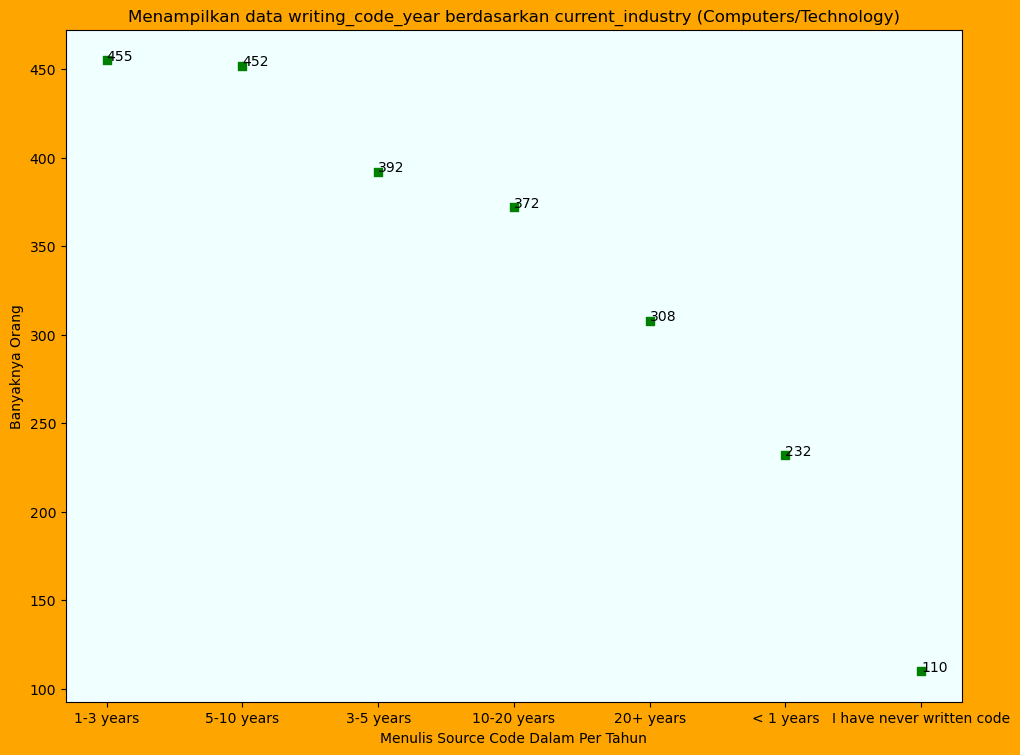

In [11]:
## 5. Menampilkan data writing_code_year berdasarkan current_industry (Computers/Technology)
soal_5 = df[['current_industry', 'writing_code_year']]
soal_5 = soal_5[df['current_industry'] == 'Computers/Technology']
hey = soal_5['writing_code_year'].value_counts()
hey.tolist()

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
fig.patch.set_facecolor('Orange')  # type: ignore
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

x = hey.index.tolist()
y = hey.tolist()

ax = plt.axes()
ax = fig.add_axes([0,0,1.4,1.4])
ax.set_facecolor("azure")
plt.title('Menampilkan data writing_code_year berdasarkan current_industry (Computers/Technology)')
plt.scatter(x, y,color='green',marker = ',')  # type: ignore
plt.xlabel('Menulis Source Code Dalam Per Tahun')
plt.ylabel('Banyaknya Orang')

addlabels(x, y)
plt.show()

In [86]:
dataku = df[['educational_status', 'writing_code_year', 'current_industry']]
# SPLITING
colX = dataku.columns[:len(dataku.columns)-1]

colY = dataku.columns[:len(dataku.columns)-2]

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import svm

X = dataku[colX]
Y = dataku[colY]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=0)

print(X_train.shape, y_train.shape) # type: ignore
print(X_test.shape, y_test.shape) # type: ignore
dataku.sum()
# clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
# clf.score(X_test, y_test)

(16797, 2) (16797, 1)
(7200, 2) (7200, 1)


C:\Users\user\AppData\Local\Temp\ipykernel_13264\1775780779.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataku.sum()


educational_status    NoNoYesNoYesYesYesNoNoYesNoYesNoNoYesYesNoNoNo...
dtype: object